In [11]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
attraction_features = pd.read_csv('../datasets/final_attractions.csv', usecols=['Name', 'Rating', 'Visitors', 'Historical', 'Natural', 'Amusement', 'Beach'])
attraction_names = list(attraction_features['Name'])
attraction_features.drop('Name', axis=1, inplace=True)
attraction_features = np.array(attraction_features)
print(len(attraction_names))

1252


In [13]:
no_of_features = attraction_features.shape[1]
som = MiniSom(10, 10, no_of_features, sigma=0.5, learning_rate=0.5)
som.random_weights_init(attraction_features)
som.train_batch(attraction_features, 1000)

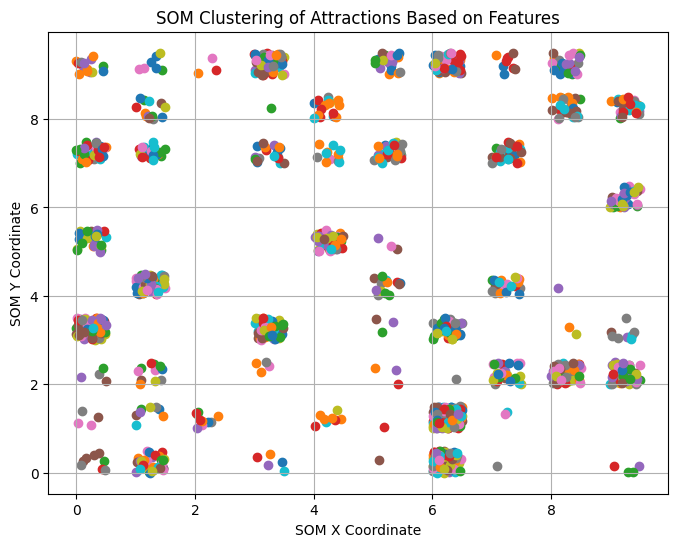

In [14]:
mapped_nodes = np.array([som.winner(attraction) for attraction in attraction_features])
plt.figure(figsize=(8, 6))
for i, node in enumerate(mapped_nodes):
    plt.scatter(node[0] + np.random.rand() * 0.5, node[1] + np.random.rand() * 0.5, label=f'Attraction {i}')
plt.title('SOM Clustering of Attractions Based on Features')
plt.xlabel('SOM X Coordinate')
plt.ylabel('SOM Y Coordinate')
plt.grid(True)
plt.show()

In [15]:
user_ratings = pd.read_csv('../datasets/user_features.csv')
print(user_ratings.head())
user_ratings.drop('Name', axis=1, inplace=True) 
user_ratings = np.array(user_ratings)
user_ratings.shape

       Name    Rating  Visitors  Historical   Natural  Amusement     Beach  \
0      Noel -0.427668 -0.774930    0.149490  0.801024   0.738766  0.999667   
1     Harsh  0.389013 -0.763299    0.328030  0.411008  -0.028038  0.755883   
2  Vikranth  0.918646 -1.232839   -0.406517  1.118889  -0.299624  0.165493   
3  Muthuraj  0.125790 -0.253804    0.568586  0.210296  -0.321106  0.697222   
4    Armaan -0.401209 -1.032330    0.529252  0.321124  -0.747958  1.209483   

          B  
0  0.835758  
1  0.939790  
2  0.370931  
3  0.952623  
4  0.663897  


(5, 7)

In [16]:
no_of_features = user_ratings.shape[1]
som = MiniSom(10, 10, no_of_features, sigma=0.5, learning_rate=0.5)
som.random_weights_init(user_ratings)
som.train_batch(user_ratings, 1000)

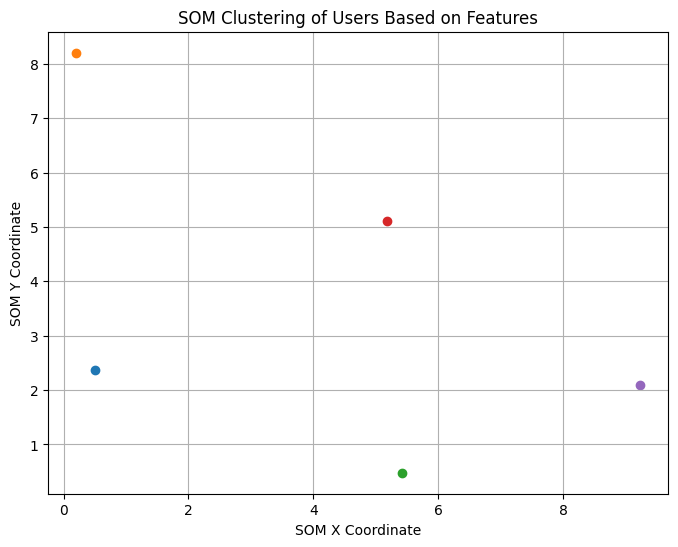

In [17]:
mapped_nodes = np.array([som.winner(user) for user in user_ratings])
plt.figure(figsize=(8, 6))
for i, node in enumerate(mapped_nodes):
    plt.scatter(node[0] + np.random.rand() * 0.5, node[1] + np.random.rand() * 0.5, label=f'Attraction {i}')
plt.title('SOM Clustering of Users Based on Features')
plt.xlabel('SOM X Coordinate')
plt.ylabel('SOM Y Coordinate')
plt.grid(True)
plt.show()